<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [1]:
%pip install pooch
%pip install matplotlib
%pip install scipy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


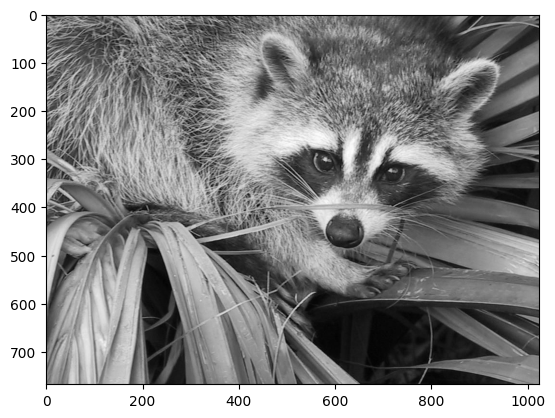

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, datasets
#Visualizar imágenes en el mismo documento, sin popups
%matplotlib inline 

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [3]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [4]:
np.shape(A)

(768, 1024)

In [5]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [6]:
import numpy as np
def sse_score(X,X_hat):
    """
    Devuelve el valor del Sum of Squared Errors.
    Se apoya en el hecho de que con numpy se pueden aplicar operaciones lineales sobre los elementos individuales de forma directa
    """
    diff_square=(X-X_hat)**2
    return np.sum(diff_square)


X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [7]:
import numpy as np
from scipy.linalg import svd as sp_la_svd

def svd(X):
    """
    Cálculo de Singular Value Desomposition
    Retorna los siguientes valores:
    - U: Matriz izquierda de autovectores por columnas
    - S: Matriz diagonal de autovalores. Se obtendrá convirtiendo los autovalores a matriz diagonal.
    - Vt: Matriz derecha de autovectores por filas
    """
    U,s,Vt=sp_la_svd(X)
    S=np.diag(s)
    return U, S, Vt # S es una matriz diagonal

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svd(X)  
print(U)
print(S)
print(Vt)


[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[[5.4649857  0.        ]
 [0.         0.36596619]]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [8]:
def reconstruction(U, S, Vt):
    """
    Retorna la matriz compuesta a partir del set de matrizes resultado de SVD
    """
    return np.dot(np.dot(U,S),Vt)

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [9]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

Error tras compresión a 50 componentes = 195489936.0


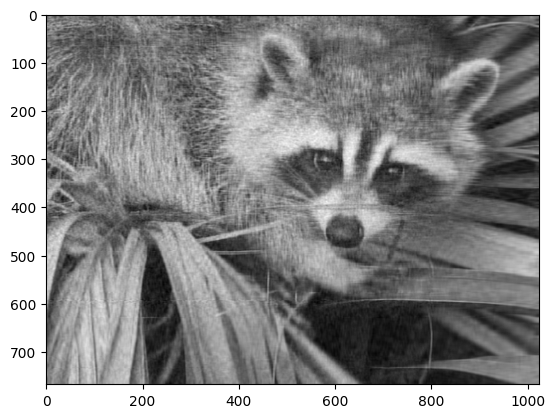

In [10]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

def image_compression(A, n_comp):
    """
    Genera la compresión de una imagen (matriz) en base la descomposición de la imagen (matriz) orignal en valores singulares (SVD) y procesando sobre estos sólo los 'n_comp' más significativos.
    El resultado es:
    - A_hat: Imagen (matriz) comprimida
    - sse: Valor del sumatorio del cuadrado de errores (Sum Square Errors)

    Si 'n_comp' es superior al número de valores singulares, se limitará su valor a ese número de valores. 
    """

    U,S,Vt=svd(A)
    #Determinación del número de componentes a procesar, limitado al máximo de componentes procesables
    max_comp=S.shape[0]
    #print(max_comp)
    components=max_comp
    if(n_comp<max_comp):
        components=n_comp
    #Obtención de las columnas requeridas de U
    Uaux=U[:,:components]
    #Obtención de los valores requeridos de S
    Saux=S[:components,:components]
    #Obtención de las filas requeridas de Vt
    Vt_aux=Vt[:components,:]

    #Recomposición de imagen
    A_hat=reconstruction(Uaux,Saux,Vt_aux)
    
    #Cálculo del sse
    sse=sse_score(A,A_hat)

    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A

#Ojo, scipy.misc.face se encuentra deprecado
#racoon = misc.face(gray=True)
racoon = datasets.face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)
print(f"Error tras compresión a 50 componentes = {sse}")
plt.imshow(racoon_hat, cmap=plt.cm.gray)


### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

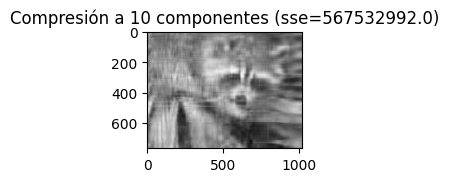

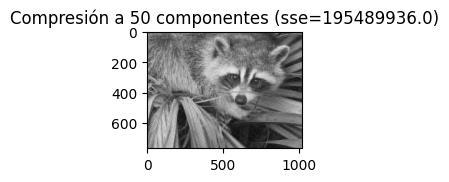

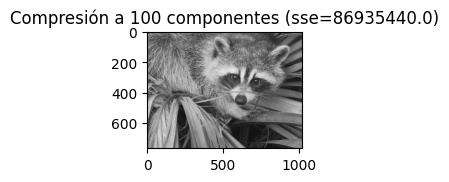

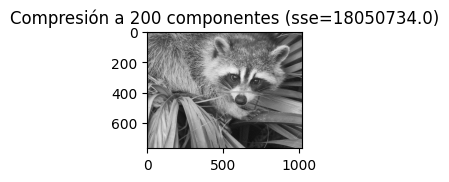

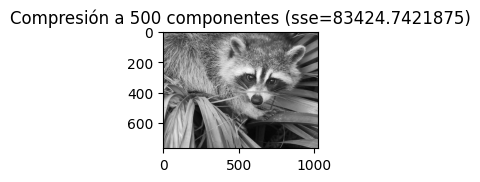

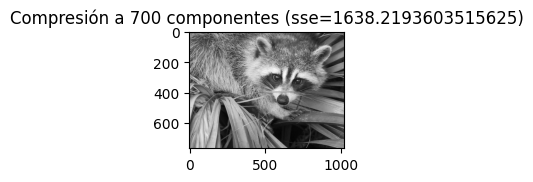

La siguiente compresión supera la cantidad de valores singulares obtenida


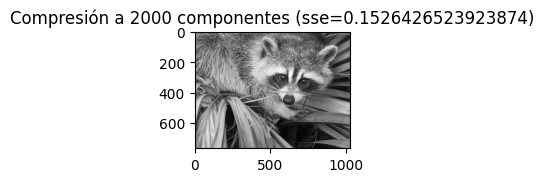

Comprobación de que no mejora el error


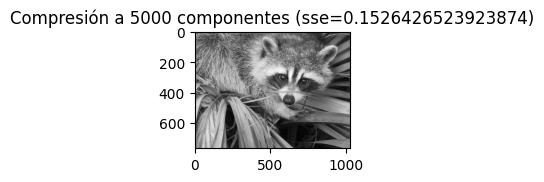

In [11]:
import matplotlib.pyplot as plt
#Constantes globales
WIDTH=2
HEIGHT=2

#Obtención de imagen original y la transformada
components=10
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

components=50
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

components=100
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

components=200
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

components=500
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

components=700
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

print("La siguiente compresión supera la cantidad de valores singulares obtenida")
components=2000
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()

print("Comprobación de que no mejora el error")
components=5000
src_image=datasets.face(gray=True)
comp_image,comp_sse=image_compression(src_image, components)
ttext=f"Compresión a {components} componentes (sse={comp_sse})"

plt.figure(figsize=(WIDTH,HEIGHT))
plt.imshow(comp_image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()


# Versión para manejar imágenes en color y en escala de grises.
* Se manejará imágenes (en forma np.array) en formato RGB o escala de grises de forma autómatica.
* En vez de seleccionar el número de componentes con los que comprimir la imagen, se seleccionará un porcentaje de componentes a procesar.
* Para facilitar la interpretación de errores, se genera un valor de error nuevo, sse medio por pixel.
* Se ha tenido que retocar la función de reconstrucción de la imagen para asegurar que los valores de los pixel permanezcan en el rango 0-255 (int8). En caso contrario la fusión de canales en imagen RBG generan resultados raros.
* Durante la reconstrucción, al forzar valores int8 (truncamiento), se generan errores. La magnitud de esos errores parece ser superior al error generado por la mera compresión a partir de un número elevado de componentes. Este efecto se observa claramente cuando se alcanza un sse por pixel inferior a 1
* De hecho se puede observar cosas raras en algunos pixels



In [12]:
def image_compression_trunc(Image, comp_percent):
    """
    Genera la compresión de una imagen (matriz) en base la descomposición de la imagen (matriz) orignal en valores singulares (SVD) y procesando sobre estos sólo el porcentaje de componentes más significativos.
    Detecta si la imagen se entrega en escala de grises ('Image' de dos dimensiones) o en formato RGB ('Image' de tres dimensiones). No se admiten arrays de otra cantidad de dimensiones
    El resultado es:
    - A_hat: Imagen (matriz) comprimida
    - sse: Valor del sumatorio del cuadrado de errores (Sum Square Errors)
    - sse_per_pixel: Valor medio del sumatorio de cuadrados de errores por pixel
    """
    import numpy as np

    def svd(X):
        """
        Cálculo de Singular Value Desomposition
        Retorna los siguientes valores:
        - U: Matriz izquierda de autovectores por columnas
        - S: Matriz diagonal de autovalores. Se obtendrá convirtiendo los autovalores a matriz diagonal.
        - Vt: Matriz derecha de autovectores por filas
        """
        from scipy.linalg import svd as sp_la_svd
        U,s,Vt=sp_la_svd(X)
        S=np.diag(s)
        return U, S, Vt
    
    def reconstruction(U, S, Vt):
        """
        Retorna la matriz compuesta a partir del set de matrizes resultado de SVD
        Asegura que los elememtos de la matriz sean de tipo int8

        """
        auxResult=np.dot(np.dot(U,S),Vt)
        #Reconstrucción a valores int8
        aux_Result_int8=auxResult.astype(np.uint8)
        return aux_Result_int8
    
    def sse_score(X,X_hat):
        """
        Devuelve el valor del Sum of Squared Errors.
        Se apoya en el hecho de que con numpy se pueden aplicar operaciones lineales sobre los elementos individuales de forma directa
        """
        diff_square=(X-X_hat)**2
        return np.sum(diff_square)

    def compress_channel(channel,comp_percent):
        """
        Procesa uno de los canales de una imagen.
        Se fija que comp_percent debe valer entre 1 y 100
        Retorna:
        - compressed_channel: matriz resultante de la operación de compresión.
        - sse: cálculo del sumatorio del cuadrado de errores.
        - sse_per_pixel: valor medio del sse por pixel
        """
        U,S,Vt=svd(channel)
        #Determinación del número de componentes a procesar
        max_comp=S.shape[0]
        if(comp_percent>100):
            comp_percent=100
        if(comp_percent<1):
            comp_percent=1
        components=int(max_comp*comp_percent/100)
        #Obtención de las columnas requeridas de U
        Uaux=U[:,:components]
        #Obtención de los valores requeridos de S
        Saux=S[:components,:components]
        #Obtención de las filas requeridas de Vt
        Vt_aux=Vt[:components,:]
        #Recomposición de imagen
        compressed_channel=reconstruction(Uaux,Saux,Vt_aux)
        #Cálculo del sse
        sse=sse_score(channel,compressed_channel)
        #Cálculo del sse medio por píxeles
        pix_amount=channel.shape[0]*channel.shape[1]
        sse_per_pixel=sse/pix_amount
        return compressed_channel, sse, sse_per_pixel

    #Obtención de características de la imagen
    image_dimensions=Image.ndim
    image_grey=image_dimensions==2
    image_rgb=image_dimensions==3
    #Inicalización del resultado
    res_image=Image
    res_sse=0.0
    res_sse_per_pixel=0.0
    if(not (image_grey or image_rgb)):
        raise ValueError(f"Número de dimensiones del array de valores ({image_dimensions}) incorrecto. Se permiten sólo arrays de 2 (imagen en gris) o 3 (imagen rgb) dimensiones")
    elif(image_grey):
        grey_img,grey_sse,grey_sse_per_pixel=compress_channel(Image,comp_percent)
        res_image=grey_img
        res_sse=grey_sse
        res_sse_per_pixel=grey_sse_per_pixel
    elif(image_rgb):
        #Extracción de canales
        ch_r=Image[:,:,0]
        ch_g=Image[:,:,1]
        ch_b=Image[:,:,2]
        #Procesamiento de cada canal
        red_img,red_sse,red_sse_per_pixel=compress_channel(ch_r,comp_percent)
        green_img,green_sse,green_sse_per_pixel=compress_channel(ch_g,comp_percent)
        blue_img,blue_sse,blue_sse_per_pixel=compress_channel(ch_b,comp_percent)

        #Composición de imagen resultado.
        red_img_3dim=red_img[...,np.newaxis]
        green_img_3dim=green_img[...,np.newaxis]
        blue_img_3dim=blue_img[...,np.newaxis]       
        res_image=np.concatenate((red_img_3dim,green_img_3dim,blue_img_3dim),axis=2)
        res_sse=red_sse+green_sse+blue_sse
        res_sse_per_pixel=(red_sse_per_pixel+green_sse_per_pixel+blue_sse_per_pixel)/3
    
    return res_image,res_sse,res_sse_per_pixel


Procesamiento de imagen en escala de grises


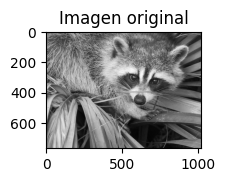

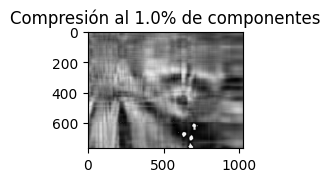

sse=74927483; sse_p_pix=95.27522150675456


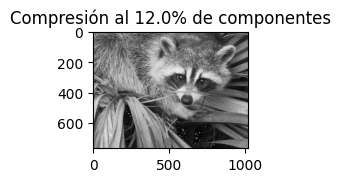

sse=45062455; sse_p_pix=57.29987462361654


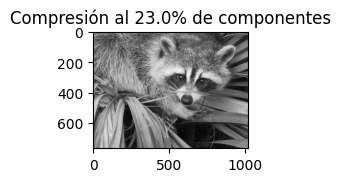

sse=23097562; sse_p_pix=29.3700688680013


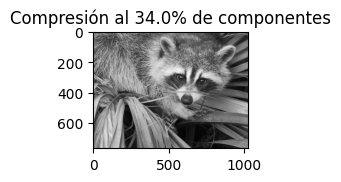

sse=6764372; sse_p_pix=8.601343790690104


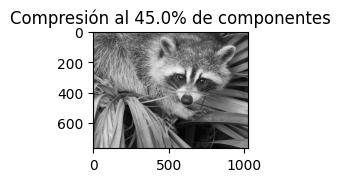

sse=1824720; sse_p_pix=2.32025146484375


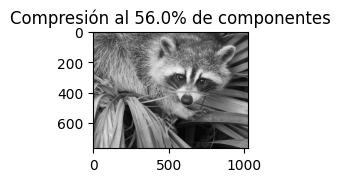

sse=609926; sse_p_pix=0.7755610148111979


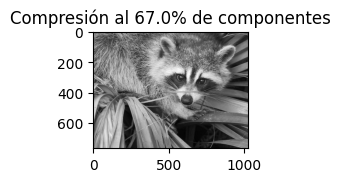

sse=397303; sse_p_pix=0.5051968892415365


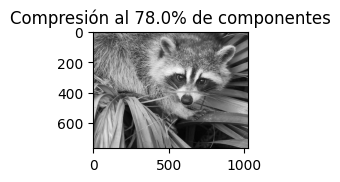

sse=393376; sse_p_pix=0.5002034505208334


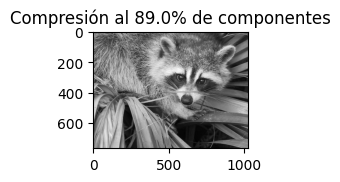

sse=393289; sse_p_pix=0.5000928243001302


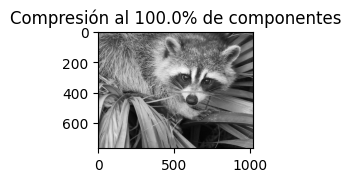

sse=404047; sse_p_pix=0.5137723286946615
Procesamiento de imagen en color


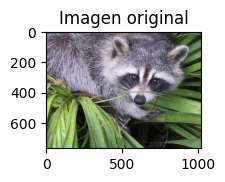

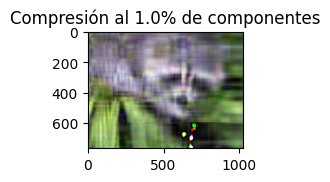

sse=223694695; sse_p_pix=94.81417126125761


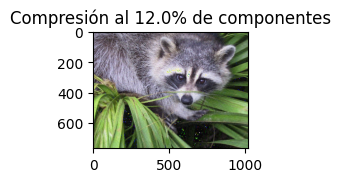

sse=136297654; sse_p_pix=57.77047644721137


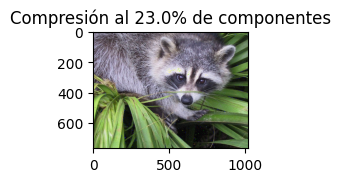

sse=70463274; sse_p_pix=29.866228739420574


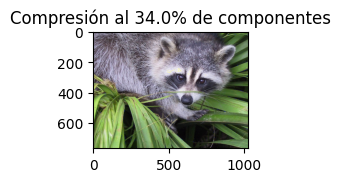

sse=20773807; sse_p_pix=8.805087195502388


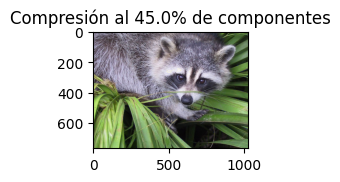

sse=5640422; sse_p_pix=2.390722486707899


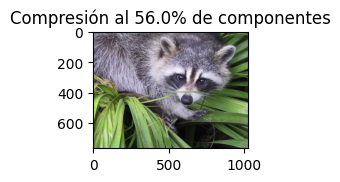

sse=1885787; sse_p_pix=0.7993007236056857


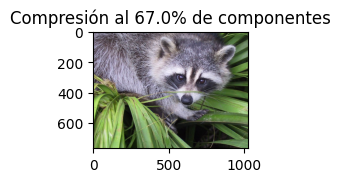

sse=1197946; sse_p_pix=0.5077557033962674


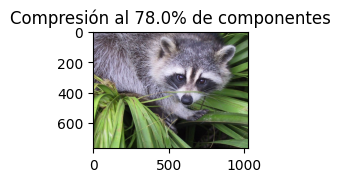

sse=1178328; sse_p_pix=0.4994405110677083


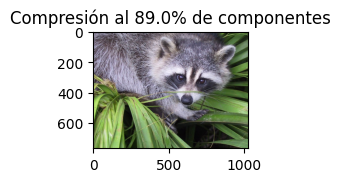

sse=1178267; sse_p_pix=0.4994146558973524


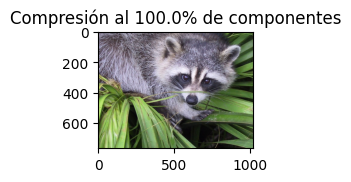

sse=1186292; sse_p_pix=0.5028160942925347


In [13]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import datasets

def show_compressions_trunc(image,width,height,amount):
    """
    Genera la visualización de 'amount' compresiones de la imagen, cada una con tamaño width, height.
    'amount' debe ser mayor o igual a 2
    Retorna una lista de 'amount' tuplas de la forma (compression_percent,sse_per_pixel)
    """
    if (amount<2):
        amount=2
    compressions_percents=np.linspace(1,100,amount)

    res=[]
    for compression in compressions_percents:
        comp_image,comp_sse,comp_sse_per_pixel=image_compression_trunc(image,compression)
        ttext=f"Compresión al {compression}% de componentes"
        plt.figure(figsize=(width,height))
        if(comp_image.ndim==2):
            plt.imshow(comp_image,cmap=plt.cm.gray)
        else:
            plt.imshow(comp_image)
        plt.title(ttext)
        plt.show()
        print(f"sse={comp_sse}; sse_p_pix={comp_sse_per_pixel}")
        res.append((compression,comp_sse_per_pixel))
    return res

print(f"Procesamiento de imagen en escala de grises")
image=datasets.face(gray=True)
ttext="Imagen original"
plt.figure(figsize=(2,2))
plt.imshow(image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()
res_gray_trunc=show_compressions_trunc(image,2,2,10)

print(f"Procesamiento de imagen en color")
image=datasets.face(gray=False)
ttext="Imagen original"
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.title(ttext)
plt.show()
res_rgb_trunc=show_compressions_trunc(image,2,2,10)



# Mejora de la función, implementando un redondeo más preciso en la función de reconstrucción
* En la función de reconstrucción original el paso directo a valores int8 supone un trucamiento (directamente omisión de decimales).
* Se aplica una función de reconstrucción más elaborada, aplicando redondeo y control de límites sobre los float antes de convertirlos a int8

In [14]:
def image_compression_round(Image, comp_percent):
    """
    Genera la compresión de una imagen (matriz) en base la descomposición de la imagen (matriz) orignal en valores singulares (SVD) y procesando sobre estos sólo el porcentaje de componentes más significativos.
    Detecta si la imagen se entrega en escala de grises ('Image' de dos dimensiones) o en formato RGB ('Image' de tres dimensiones). No se admiten arrays de otra cantidad de dimensiones
    El resultado es:
    - A_hat: Imagen (matriz) comprimida
    - sse: Valor del sumatorio del cuadrado de errores (Sum Square Errors)
    - sse_per_pixel: Valor medio del sumatorio de cuadrados de errores por pixel
    """
    import numpy as np

    def svd(X):
        """
        Cálculo de Singular Value Desomposition
        Retorna los siguientes valores:
        - U: Matriz izquierda de autovectores por columnas
        - S: Matriz diagonal de autovalores. Se obtendrá convirtiendo los autovalores a matriz diagonal.
        - Vt: Matriz derecha de autovectores por filas
        """
        from scipy.linalg import svd as sp_la_svd
        U,s,Vt=sp_la_svd(X)
        S=np.diag(s)
        return U, S, Vt
    
    def reconstruction(U, S, Vt):
        """
        Retorna la matriz compuesta a partir del set de matrizes resultado de SVD
        Asegura que los elememtos de la matriz sean de tipo (int8) siguiendo la siguiente secuencia:
        1 - Redondeo de floats
        2 - Aseguramiento de límites sobre los floats
        3 - Conversión a int8

        """
        auxResult=np.dot(np.dot(U,S),Vt)
        auxResult_round=np.round(auxResult)
        auxResult_limited=np.clip(auxResult_round,0,255)
        aux_Result_int8=auxResult_limited.astype(np.uint8)
        return aux_Result_int8
    
    def sse_score(X,X_hat):
        """
        Devuelve el valor del Sum of Squared Errors.
        Se apoya en el hecho de que con numpy se pueden aplicar operaciones lineales sobre los elementos individuales de forma directa
        """
        diff_square=(X-X_hat)**2
        return np.sum(diff_square)

    def compress_channel(channel,comp_percent):
        """
        Procesa uno de los canales de una imagen.
        Se fija que comp_percent debe valer entre 1 y 100
        Retorna:
        - compressed_channel: matriz resultante de la operación de compresión.
        - sse: cálculo del sumatorio del cuadrado de errores.
        - sse_per_pixel: valor medio del sse por pixel
        """
        U,S,Vt=svd(channel)
        #Determinación del número de componentes a procesar
        max_comp=S.shape[0]
        if(comp_percent>100):
            comp_percent=100
        if(comp_percent<1):
            comp_percent=1
        components=int(max_comp*comp_percent/100)
        #Obtención de las columnas requeridas de U
        Uaux=U[:,:components]
        #Obtención de los valores requeridos de S
        Saux=S[:components,:components]
        #Obtención de las filas requeridas de Vt
        Vt_aux=Vt[:components,:]
        #Recomposición de imagen
        compressed_channel=reconstruction(Uaux,Saux,Vt_aux)
        #Cálculo del sse
        sse=sse_score(channel,compressed_channel)
        #Cálculo del sse medio por píxeles
        pix_amount=channel.shape[0]*channel.shape[1]
        sse_per_pixel=sse/pix_amount
        return compressed_channel, sse, sse_per_pixel

    #Obtención de características de la imagen
    image_dimensions=Image.ndim
    image_grey=image_dimensions==2
    image_rgb=image_dimensions==3
    #Inicalización del resultado
    res_image=Image
    res_sse=0.0
    res_sse_per_pixel=0.0
    if(not (image_grey or image_rgb)):
        raise ValueError(f"Número de dimensiones del array de valores ({image_dimensions}) incorrecto. Se permiten sólo arrays de 2 (imagen en gris) o 3 (imagen rgb) dimensiones")
    elif(image_grey):
        grey_img,grey_sse,grey_sse_per_pixel=compress_channel(Image,comp_percent)
        res_image=grey_img
        res_sse=grey_sse
        res_sse_per_pixel=grey_sse_per_pixel
    elif(image_rgb):
        #Extracción de canales
        ch_r=Image[:,:,0]
        ch_g=Image[:,:,1]
        ch_b=Image[:,:,2]
        #Procesamiento de cada canal
        red_img,red_sse,red_sse_per_pixel=compress_channel(ch_r,comp_percent)
        green_img,green_sse,green_sse_per_pixel=compress_channel(ch_g,comp_percent)
        blue_img,blue_sse,blue_sse_per_pixel=compress_channel(ch_b,comp_percent)

        #Composición de imagen resultado.
        red_img_3dim=red_img[...,np.newaxis]
        green_img_3dim=green_img[...,np.newaxis]
        blue_img_3dim=blue_img[...,np.newaxis]       
        res_image=np.concatenate((red_img_3dim,green_img_3dim,blue_img_3dim),axis=2)
        res_sse=red_sse+green_sse+blue_sse
        res_sse_per_pixel=(red_sse_per_pixel+green_sse_per_pixel+blue_sse_per_pixel)/3
    
    return res_image,res_sse,res_sse_per_pixel


---------- Procesamiento de imagen en escala de grises ----------


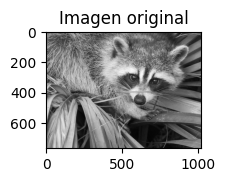

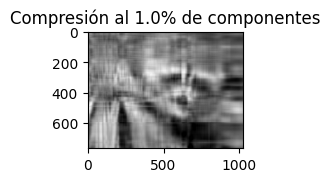

sse=74807239; sse_p_pix=95.12232335408528


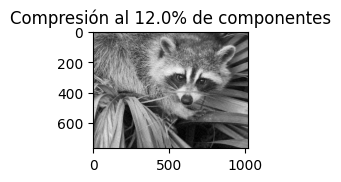

sse=44926894; sse_p_pix=57.12749989827474


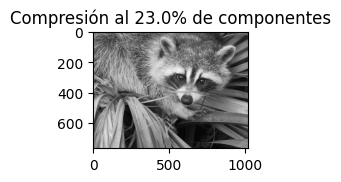

sse=22912939; sse_p_pix=29.135308583577473


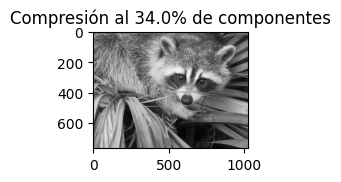

sse=6568436; sse_p_pix=8.352198282877604


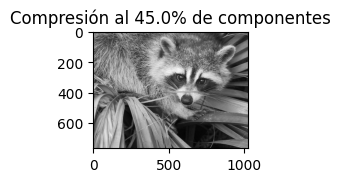

sse=1627136; sse_p_pix=2.0690104166666665


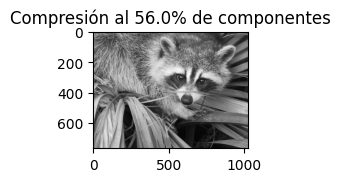

sse=403357; sse_p_pix=0.5128949483235677


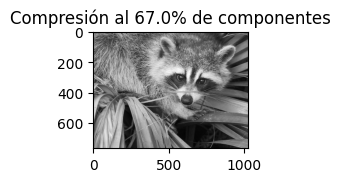

sse=58071; sse_p_pix=0.07384109497070312


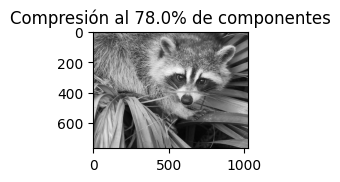

sse=473; sse_p_pix=0.0006014506022135416


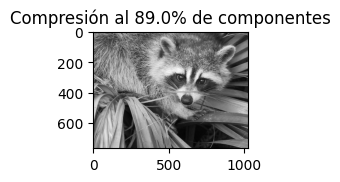

sse=0; sse_p_pix=0.0


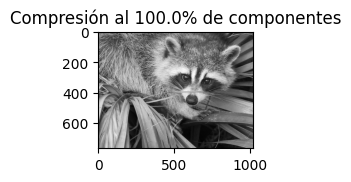

sse=0; sse_p_pix=0.0
---------- Procesamiento de imagen en color ----------


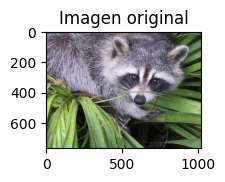

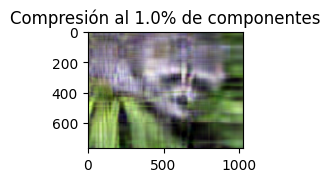

sse=223556332; sse_p_pix=94.75552537706163


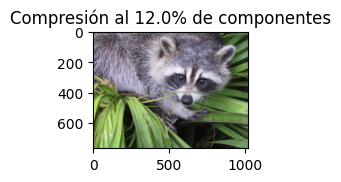

sse=135948325; sse_p_pix=57.62241151597765


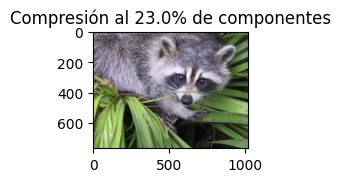

sse=69872107; sse_p_pix=29.61565950181749


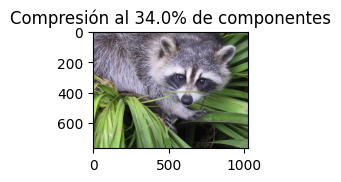

sse=20178066; sse_p_pix=8.552579243977865


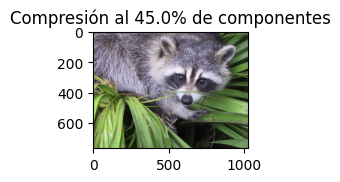

sse=5043578; sse_p_pix=2.1377470228407116


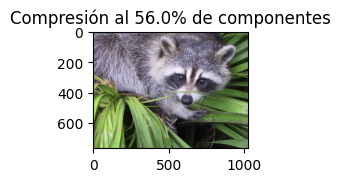

sse=1272120; sse_p_pix=0.5391947428385416


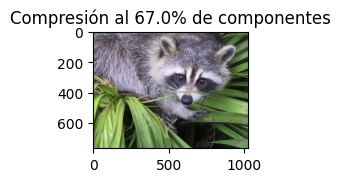

sse=215335; sse_p_pix=0.0912708706325955


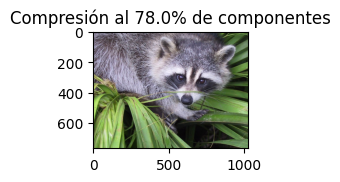

sse=7734; sse_p_pix=0.0032780965169270835


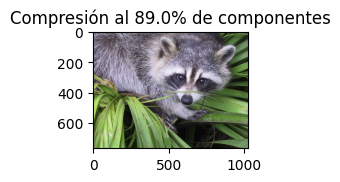

sse=6; sse_p_pix=2.5431315104166665e-06


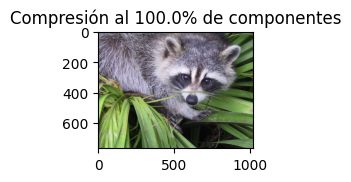

sse=0; sse_p_pix=0.0


In [15]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import datasets

def show_compressions_round(image,width,height,amount):
    """
    Genera la visualización de 'amount' compresiones de la imagen, cada una con tamaño width, height.
    'amount' debe ser mayor o igual a 2.
    Retorna una lista de 'amount' tuplas de la forma (compression_percent,sse_per_pixel)
    """
    if (amount<2):
        amount=2
    compressions_percents=np.linspace(1,100,amount)

    res=[]
    for compression in compressions_percents:
        comp_image,comp_sse,comp_sse_per_pixel=image_compression_round(image,compression)
        ttext=f"Compresión al {compression}% de componentes"
        plt.figure(figsize=(width,height))
        if(comp_image.ndim==2):
            plt.imshow(comp_image,cmap=plt.cm.gray)
        else:
            plt.imshow(comp_image)
        plt.title(ttext)
        plt.show()
        print(f"sse={comp_sse}; sse_p_pix={comp_sse_per_pixel}")
        res.append((compression,comp_sse_per_pixel))
    return res

print("---------- Procesamiento de imagen en escala de grises ----------")
image=datasets.face(gray=True)
ttext="Imagen original"
plt.figure(figsize=(2,2))
plt.imshow(image,cmap=plt.cm.gray)
plt.title(ttext)
plt.show()
res_gray_round=show_compressions_round(image,2,2,10)

print("---------- Procesamiento de imagen en color ----------")
image=datasets.face(gray=False)
ttext="Imagen original"
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.title(ttext)
plt.show()
res_rgb_round=show_compressions_round(image,2,2,10)



# Representación de errores en función de porcentaje de componentes
Considerando sólo las imágenes rbg, se representa la evolución de los errores según la cantidad de componentes empleados para la compresión.
Una curva se corresponde con los errores empleando el método de truncado, la otra se corresponde con los errores empleando el método del redondeo.


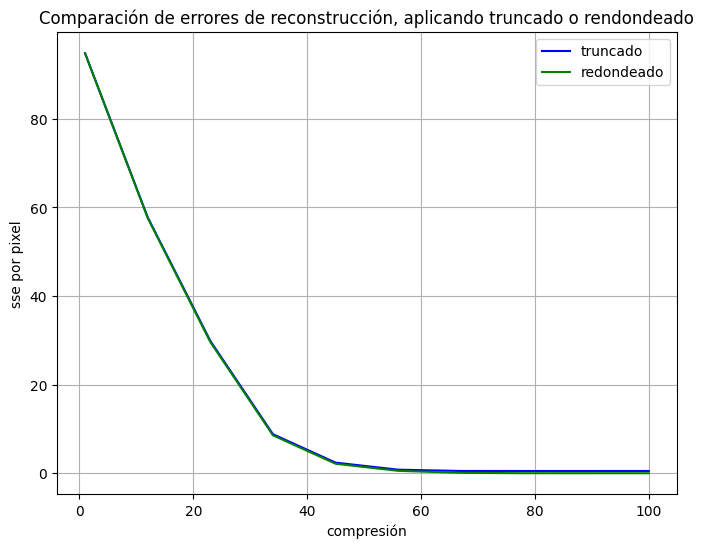

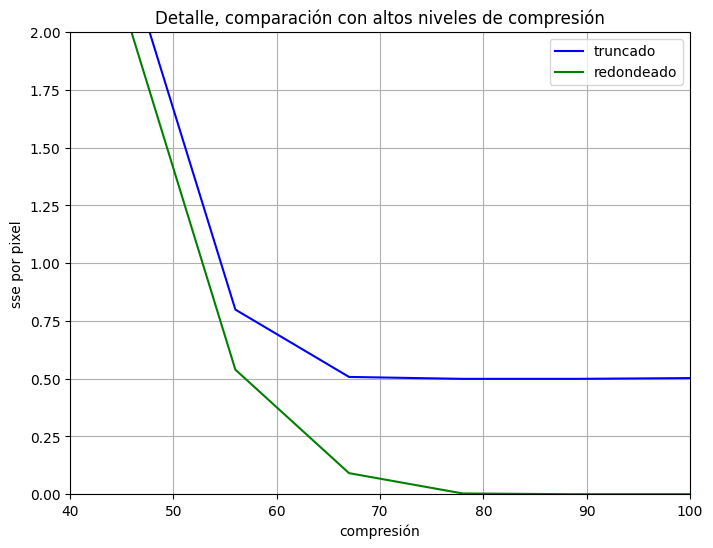

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x_rgb_trunc=[]
y_rgb_trunc=[]
for (x,y) in res_rgb_trunc:
    x_rgb_trunc.append(x)
    y_rgb_trunc.append(y)

x_rgb_round=[]
y_rgb_round=[]
for (x,y) in res_rgb_round:
    x_rgb_round.append(x)
    y_rgb_round.append(y)


plt.figure(figsize=(8, 6)) 
plt.plot(x_rgb_trunc, y_rgb_trunc, label = 'truncado', color='b')
plt.plot(x_rgb_round, y_rgb_round, label = 'redondeado', color='g')
plt.xlabel('compresión')
plt.ylabel('sse por pixel')
plt.title("Comparación de errores de reconstrucción, aplicando truncado o rendondeado")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 6)) 
plt.plot(x_rgb_trunc, y_rgb_trunc, label = 'truncado', color='b')
plt.plot(x_rgb_round, y_rgb_round, label = 'redondeado', color='g')
plt.xlabel('compresión')
plt.ylabel('sse por pixel')
plt.xlim(40,100)
plt.ylim(0,2)
plt.title("Detalle, comparación con altos niveles de compresión")
plt.grid()
plt.legend()
plt.show()
